# A demo process for parameter guidelines

This is a walkthough of major steps from the actual parameter user guide.
## Overview
1. user uploads their data and choose a target
2. process shows the feature importance for the chosen target
3. user chooses which attributes to mark
4. the process fingerprints the data
5. the process shows the obtained utility via mean, variance and performance on different ML classifiers as a function of number of marks
6. the process shows robustness against the attacks as a function of number of marks

(ideally, the process now finds some correlations between the dataset characteristics and obtained quality)

In [1]:
import os
import pandas as pd

In [2]:
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [3]:
from datasets import BreastCancerWisconsin

In [4]:
data = BreastCancerWisconsin().load()  # todo: fix this pls

In [5]:
data.head()

,sample-code-number,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
# what's the target?
target = 'class'

In [7]:
# todo: feature importance

In [8]:
# which attributes (not) to fingerprint? (except, obviously, target)
# exclude = ['sample-code-number']
primary_key_attribute = 'sample-code-number'

In [9]:
from scheme import AKScheme

In [10]:
gamma = 1
xi = 1
fplen = 8
sk = 341
numbuyers = 10

In [11]:
scheme = AKScheme(gamma, xi, fplen, sk, numbuyers)
fingerprinted_data = scheme.insertion(data, 1, exclude=[target], primary_key_attribute=primary_key_attribute)

Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10001011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 84 times
Time: <1 sec.


In [12]:
fingerprinted_data

,sample-code-number,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,2,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,0,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,9,6,4,3,4,10,6,1,4


In [13]:
# todo: implement some kind of summary or show differences or something like that
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Marked values per column')

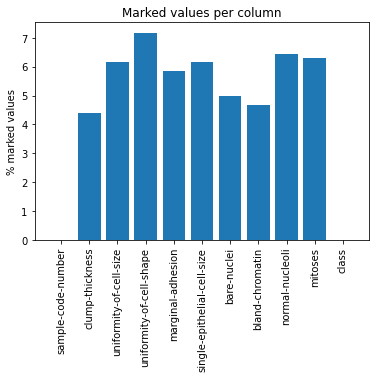

In [14]:
percentage = {}
for index in range(len(data.columns)):
    original = data[data.columns[index]]
    fingerprinted = fingerprinted_data[data.columns[index]]
    num_of_changes = len(original.compare(fingerprinted))
    percentage[data.columns[index]] = (num_of_changes / len(data)) * 100
plt.bar(percentage.keys(), percentage.values())
plt.xticks(rotation=90)
plt.ylabel('% marked values')
plt.title('Marked values per column')

In [15]:
percentage

{'sample-code-number': 0.0,
 'clump-thickness': 4.392386530014641,
 'uniformity-of-cell-size': 6.149341142020498,
 'uniformity-of-cell-shape': 7.174231332357247,
 'marginal-adhesion': 5.856515373352855,
 'single-epithelial-cell-size': 6.149341142020498,
 'bare-nuclei': 4.978038067349927,
 'bland-chromatin': 4.685212298682284,
 'normal-nucleoli': 6.44216691068814,
 'mitoses': 6.295754026354319,
 'class': 0.0}

In [16]:
import numpy as np

In [17]:
# change in mean
mean_original = [np.mean(data[attribute]) for attribute in data]
mean_fingerprint = [np.mean(fingerprinted_data[attribute]) for attribute in fingerprinted_data]
delta_mean = [fp - org for fp, org in zip(mean_fingerprint, mean_original)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

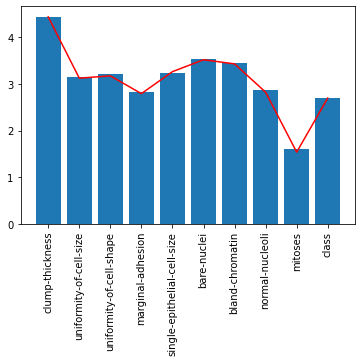

In [18]:
plt.plot(mean_fingerprint[1:], color='red')
plt.bar(data.columns[1:], mean_original[1:])
plt.xticks(rotation=90)

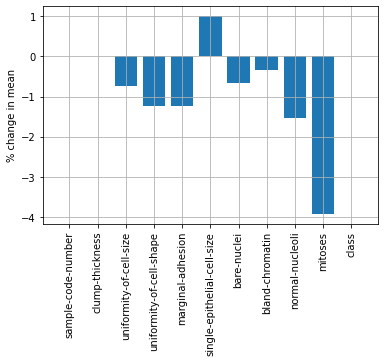

In [19]:
plt.bar(data.columns, [(diff/mean)*100  for diff, mean in zip(delta_mean, mean_original)])
plt.xticks(rotation=90)
plt.ylabel('% change in mean')
plt.grid()

In [20]:
# change in variance
var_original = [np.var(data[attribute]) for attribute in data]
var_fingerprint = [np.var(fingerprinted_data[attribute]) for attribute in fingerprinted_data]
delta_var = [fp - org for fp, org in zip(var_fingerprint, var_original)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

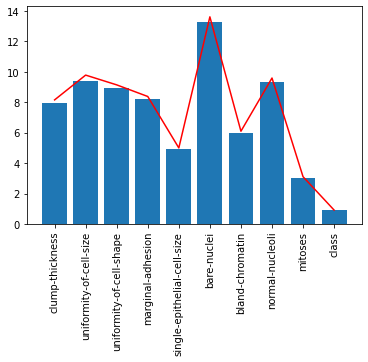

In [21]:
plt.plot(var_fingerprint[1:], color='red')
plt.bar(data.columns[1:], var_original[1:])
plt.xticks(rotation=90)

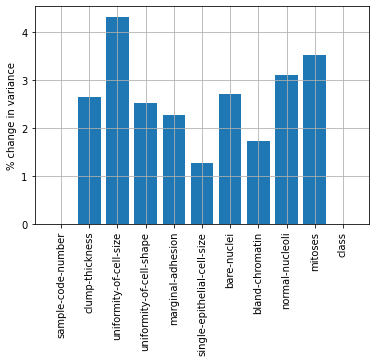

In [22]:
plt.bar(data.columns, [(diff/var)*100  for diff, var in zip(delta_var, var_original)])
plt.xticks(rotation=90)
plt.ylabel('% change in variance')
plt.grid()

This shall be ran on n fingerprinted datasets and recorded the mean of all the means/variances, plus we can plot the variance of these values.

## Utility as ML performance
Classifiers:
1. Decision Tree
2. Logistic Regression
3. SVM 
4. Boosting algorithm
5. Random Forest
6. KNN
7. Perceptron

We do only the necessary preprocessing (categorical to numerical, normalization where necessary). 
- how do we know that this properly reflects the behaviour? We don't but we assume. 
- how to actually choose the baseline? Should we do a minimal random/grid search for the hyperparameters? Probably a good idea. 

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [24]:
model = DecisionTreeClassifier(random_state=0)

In [23]:
X = data.drop([target, 'sample-code-number'], axis=1)
y = data[target]

In [26]:
# performance on the original data via 5-fold cross validation
score = cross_val_score(model, X, y, cv=5)
print(score)

[0.91240876 0.9270073  0.94890511 0.96323529 0.93382353]


In [27]:
X_fp = fingerprinted_data.drop([target, 'sample-code-number'], axis=1)
y_fp = fingerprinted_data[target]

In [28]:
from utils import *
from pprint import pprint

In [29]:
fp_score = fp_cross_val_score(model, X, y, X_fp, y_fp, cv=5)
pprint(fp_score)

{'fit_time': array([0.00500417, 0.00700855, 0.00599957, 0.00299644, 0.00300002]),
 'score_time': array([0.0019958 , 0.00399113, 0.00199413, 0.00199986, 0.00199986]),
 'test_score': array([0.88321168, 0.9270073 , 0.90510949, 0.97058824, 0.93382353])}


In [30]:
diff = np.mean(fp_score['test_score']) - np.mean(score)
print(diff)

-0.013127951910691271


This is just one iteration. In the real evaluation, the experiment has to be repeated 100+ times. I.e.:
- fingeprint the data with a distinct secret key
- evaluate the performance via cross validation
- repeat 1 and 2 many times and average it out

### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(random_state=0)

In [33]:
# original score
score = cross_val_score(model, X, y, cv=5)
print(score)

[0.94160584 0.94160584 0.98540146 0.97794118 0.98529412]


In [34]:
# fingerprinted score
fp_score = fp_cross_val_score(model, X_fp, y_fp, X, y, cv=5)

In [35]:
diff = np.mean(fp_score['test_score']) - np.mean(score)
print(diff)

0.0


Again, the experiment needs to be repeated n times. Also, the same workflow will follow for other classifiers. 

Let us now try to show the entire evaluation on one of the classifiers, e.g. kNN.

### kNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
model = KNeighborsClassifier()  # default k = 5

In [38]:
# score the original model
score = cross_val_score(model, X, y, cv=5)
print(score)

[0.93430657 0.94890511 0.98540146 0.99264706 0.98529412]


In [39]:
n_fingerprints = 10

In [40]:
fingerprinted_datasets = []
score_diff = []
for embedding_idx in range(n_fingerprints):
    sk = embedding_idx*3  # just a dummy value
    # define the scheme - everything stays fixed except for the secret key sk
    scheme = AKScheme(gamma, xi, fplen, sk, numbuyers)
    fingerprinted_data = scheme.insertion(data, 1, exclude=[target], primary_key_attribute=primary_key_attribute)
    fingerprinted_datasets.append(fingerprinted_data)
    
    # split target and features
    X_fp = fingerprinted_data.drop([target, 'sample-code-number'], axis=1)
    y_fp = fingerprinted_data[target]
    
    # define the model and evaluate
    model = KNeighborsClassifier()
    
    # score the fingerprinted model
    fp_score = fp_cross_val_score(model, X_fp, y_fp, X, y, cv=5)
    
    # calculate the difference
    diff = np.mean(fp_score['test_score']) - np.mean(score)
    score_diff.append(diff)

Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 87 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 96 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01100001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 91 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01011100
In

In [41]:
score_diff

[-0.004401030485186808,
 0.0,
 -0.002941176470588225,
 0.0014598540145985828,
 1.073422069552965e-05,
 -1.0734220695640673e-05,
 -0.0014598540145985828,
 0.0014705882352942234,
 -0.004390296264491278,
 -0.0014598540145985828]

How much of utility loss do we have with a certain gamma value for kNN?

In [42]:
np.mean(score_diff)

-0.001172176899957078

Now let's see that loss for a range of gamma values (hypothesis is that with a smaller gamma (increased number of values), decreases in utility are bigger)

In [43]:
gammae = [i for i in range(1, 7)]
results = {g: [] for g in gammae}

n_fingerprints = 100
for gamma in gammae:
    for embedding_idx in range(n_fingerprints):
        sk = embedding_idx*3  # just a dummy value
        # define the scheme - everything stays fixed except for the secret key sk
        scheme = AKScheme(gamma, xi, fplen, sk, numbuyers)
        fingerprinted_data = scheme.insertion(data, 1, exclude=[target], primary_key_attribute=primary_key_attribute)

        # split target and features
        X_fp = fingerprinted_data.drop([target, 'sample-code-number'], axis=1)
        y_fp = fingerprinted_data[target]

        # define the model and evaluate
        model = KNeighborsClassifier()

        # score the fingerprinted model
        fp_score = fp_cross_val_score(model, X_fp, y_fp, X, y, cv=5)

        # calculate the difference
        diff = np.mean(fp_score['test_score']) - np.mean(score)
        results[gamma].append(diff)

Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 87 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 96 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01100001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 91 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01011100
In

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 75 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10111100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 78 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 11010101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00101111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 92 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00001001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 92 times
Time: <1

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 84 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 11011010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 82 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01110110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 103 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 11001001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 87 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10100111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 74 times
Time: <

Fingerprint inserted.
	marked tuples: ~46.85212298682284%
	single fingerprint bit embedded 40 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10011101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~53.440702781844806%
	single fingerprint bit embedded 37 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01001011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~47.58418740849194%
	single fingerprint bit embedded 47 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10101011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.04831625183016%
	single fingerprint bit embedded 44 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01110011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~51.53733

Fingerprint inserted.
	marked tuples: ~50.95168374816984%
	single fingerprint bit embedded 55 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11010111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~51.97657393850659%
	single fingerprint bit embedded 47 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00111111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~51.244509516837475%
	single fingerprint bit embedded 43 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~51.68374816983895%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.80527

Fingerprint inserted.
	marked tuples: ~48.02342606149341%
	single fingerprint bit embedded 53 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00010011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.487554904831626%
	single fingerprint bit embedded 40 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10011011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~53.14787701317716%
	single fingerprint bit embedded 43 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10110100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~48.31625183016106%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01110101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~51.97657

Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 01001110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~34.2606149341142%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 00010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~33.08931185944363%
	single fingerprint bit embedded 34 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 10101011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~35.43191800878478%
	single fingerprint bit embedded 35 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 01110011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~33.96778916544656%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1


Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 00101111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~31.332357247437777%
	single fingerprint bit embedded 25 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 11011010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~34.2606149341142%
	single fingerprint bit embedded 30 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~32.06442166910688%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 00110001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~33.08931185944363%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 10000111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~33.52855051244509%
	single fingerprint bit embedded 25 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 11010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~28.550512445095166%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 11011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~33.08931185944363%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for buyer 1: 01111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~37.48169838945827%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 

Fingerprint inserted.
	marked tuples: ~26.35431918008785%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11000101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~21.815519765739385%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01010010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~29.428989751098094%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11101001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.061493411420205%
	single fingerprint bit embedded 22 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00001000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~28.111

Fingerprint inserted.
	marked tuples: ~26.207906295754025%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.647144948755493%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.743777452415813%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01001011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~22.840409956076137%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10111000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~23.57

Fingerprint inserted.
	marked tuples: ~24.597364568081993%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01011000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.76866764275256%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10011001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.30453879941435%
	single fingerprint bit embedded 28 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~21.96193265007321%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01101001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~23.42606

Fingerprint inserted.
	marked tuples: ~23.42606149341142%
	single fingerprint bit embedded 25 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for buyer 1: 11000011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~22.10834553440703%
	single fingerprint bit embedded 26 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for buyer 1: 10011011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~20.644216691068813%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for buyer 1: 01111111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~20.20497803806735%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for buyer 1: 11111101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~22.84040

Fingerprint inserted.
	marked tuples: ~17.86237188872621%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for buyer 1: 00100010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~18.448023426061493%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for buyer 1: 01110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~16.691068814055637%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for buyer 1: 00001110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~21.669106881405565%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for buyer 1: 00010100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~19.326

Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~18.155197657393852%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 01110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~16.251830161054173%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 01100001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~15.666178623718888%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 01011100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~17.86237188872621%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi

Fingerprint inserted.
	marked tuples: ~14.202049780380674%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 10000011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~17.1303074670571%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 10111100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~17.423133235724745%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 11010101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~16.83748169838946%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 00101111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~16.544655

Fingerprint inserted.
	marked tuples: ~17.276720351390924%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 00101011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~16.83748169838946%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 10001010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~17.86237188872621%
	single fingerprint bit embedded 17 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 11010010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~18.155197657393852%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for buyer 1: 11011010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~17.7159

Text(0, 0.5, 'Accuracy difference original - fingerprinted')

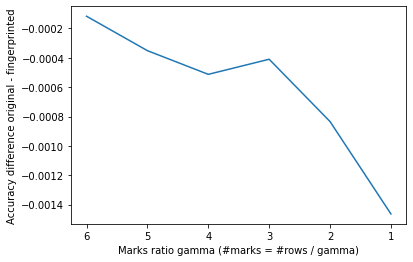

In [44]:
plt.plot(results.keys(), list(map(np.mean, results.values())))
plt.gca().invert_xaxis()
plt.xlabel('Marks ratio gamma (#marks = #rows / gamma)')
plt.ylabel('Accuracy difference original - fingerprinted')

## Robustness per se (extraction rate)

The goal here is to see the extraction rate of detection algorithm. For that, we vary the number of marks (ratio gamma) and repeat insertion+detection n times, for example 100. We watch the trends. Hopefully for some gamma the extraction rate gets to 100%. 

In [24]:
n_experiments = 100
gammae = [1, 2, 4, 7, 10, 50, 60, 70, 80, 90, 100]   # define the rule for possible gamma choices, i.e. #rows/(L*gamma) > 1
Ls = [8, 16]
results = {l: {g: 0 for g in gammae} for l in Ls}
for L in Ls:
    for gamma in gammae:
        for exp_idx in range(n_experiments):
            # fingerprint
            # xi, fplen and numbuyers is fixed
            sk = exp_idx*gamma  # just a random number but different every time
            scheme = AKScheme(gamma, xi, L, sk, numbuyers)
            user = 1
            fingerprinted_data = scheme.insertion(data, user, exclude=[target], primary_key_attribute=primary_key_attribute)

            # detect 
            suspect = scheme.detection(fingerprinted_data, exclude=[target], primary_key_attribute=primary_key_attribute)

            # compare if it's correct 
            if suspect == user:
                results[L][gamma] += 1  # counts correct extractions
                # todo: count false attribution extractions (i.e. existing user but a wrong one)


Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01011111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 97 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 99 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10111110
Buyer 

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 85 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00010111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 85 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00010111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10101111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 83 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 0110001

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10011100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01100010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 95 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01100010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00101111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 89 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 0110101

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 80 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01010010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 11111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 75 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00111011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 73 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00111011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 1110100

Fingerprint inserted.
	marked tuples: ~51.97657393850659%
	single fingerprint bit embedded 39 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01011111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.366032210834554%
	single fingerprint bit embedded 51 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.658857979502194%
	single fingerprint bit embedded 39 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11010110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Gene

Fingerprint detected: 11001111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~52.26939970717424%
	single fingerprint bit embedded 44 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01110000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01100010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.366032210834554%
	single fingerprint bit embedded 48 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01100010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01101011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.780380673499266%
	single fingerprint bit embedded 38

Fingerprint detected: 10010111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10011011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~48.6090775988287%
	single fingerprint bit embedded 54 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10111000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~51.244509516837475%
	single fingerprint bit embedded 55 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10111000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01010000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.95168374816984%
	single fingerprint bit embedded 47 t

Fingerprint inserted.
	marked tuples: ~51.244509516837475%
	single fingerprint bit embedded 43 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00111111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00101011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.487554904831626%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00101011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10000010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~48.16983894582723%
	single fingerprint bit embedded 40 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10000010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Gene

Fingerprint inserted.
	marked tuples: ~51.83016105417276%
	single fingerprint bit embedded 50 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11001011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~48.31625183016106%
	single fingerprint bit embedded 41 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11001011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01000011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~46.5592972181552%
	single fingerprint bit embedded 41 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01000011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generat

Fingerprint inserted.
	marked tuples: ~25.036603221083453%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11011011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.647144948755493%
	single fingerprint bit embedded 22 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01111111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~23.865300146412885%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01111111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Gen

Fingerprint detected: 00110001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01100000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.76866764275256%
	single fingerprint bit embedded 26 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01101000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.207906295754025%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01101000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.647144948755493%
	single fingerprint bit embedded 29

Fingerprint detected: 01110010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10000111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~21.2298682284041%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10000111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00001000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.061493411420205%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00001000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11110110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~22.693997071742313%
	single fingerprint bit embedded 26 

Fingerprint inserted.
	marked tuples: ~22.986822840409957%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00100001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11100010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~23.718887262079065%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11100010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01010011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~23.2796486090776%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01010011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Gener

Fingerprint detected: 10111000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 11000111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~15.812591508052709%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11000111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 11111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~13.177159590043924%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 10010100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.787701317715959%
	single fingerprint bit embedded 1

Fingerprint inserted.
	marked tuples: ~13.469985358711567%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10100010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~11.127379209370424%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 01111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01000101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.348462664714495%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 01000101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Gener

Fingerprint inserted.
	marked tuples: ~17.86237188872621%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 00101010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~13.030746705710103%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00101010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 00001101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.93411420204978%
	single fingerprint bit embedded 21 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00001101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Gener

Fingerprint inserted.
	marked tuples: ~13.76281112737921%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11111011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~12.88433382137628%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 01000110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 10000001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.641288433382138%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10000001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Gener

Fingerprint inserted.
	marked tuples: ~10.68814055636896%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11000100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~12.591508052708638%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11000100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01010000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~9.66325036603221%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01010000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Ge

Fingerprint inserted.
	marked tuples: ~10.248901903367496%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01110000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01101111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.395314787701318%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10110010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~9.956076134699854%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10110010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1


Fingerprint inserted.
	marked tuples: ~8.931185944363104%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10101001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11011000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~11.566617862371888%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11011000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.052708638360176%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Ge

Fingerprint detected: 01000000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 00011101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~9.809663250366032%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 00011101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 00010001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.931185944363104%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 00010001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01011110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.931185944363104%
	single fingerprint bit embedded 

Fingerprint detected: 10121112
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 12210111
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 00100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 22120100
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 11000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 2 times
Time: <1

Fingerprint inserted.
	marked tuples: ~2.4890190336749636%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 02010110
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 11010001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 11012001
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 01110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.781844802342606%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 01210000
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprin

Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 10222021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 01000001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 22000001
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 10100011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.1961932650073206%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 10202011
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 01011100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~3.074

Fingerprint inserted.
	marked tuples: ~1.7569546120058566%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 02111001
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 01101101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.049780380673499%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 01101101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 00011010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 00211010
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fin

Fingerprint inserted.
	marked tuples: ~2.9282576866764276%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 10102011
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 00001001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 20001001
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 11110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 12110002
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerpr

Fingerprint detected: 12210021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 11010111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 21210111
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 11110101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.1961932650073206%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 22110101
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 00101101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.610541727672035%
	single fingerprint bit embedded 2 times
Time: <1 

Fingerprint inserted.
	marked tuples: ~2.1961932650073206%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 01102120
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 10101100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 22101120
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 00001001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 00001021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerpri

Fingerprint detected: 21002102
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 11101110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.1961932650073206%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 11101210
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 11010001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.7569546120058566%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 11012021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 11000000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.049780380673499%
	single fingerprint bit embedded 1 times
Time: <1 

Fingerprint inserted.
	marked tuples: ~1.610541727672035%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 11100022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.7320644216691069%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 22012211
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 10001100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.8784773060029283%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 10022220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerpri

Fingerprint inserted.
	marked tuples: ~0.7320644216691069%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 20101222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 00001101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.8784773060029283%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 20221121
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 11110011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 22112021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerpr

Fingerprint detected: 11220120
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 10011101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.8784773060029283%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 20012201
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 11001111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.7569546120058566%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 11001111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 00011000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 0 times
Ti

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 22101002
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 01100101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.610541727672035%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 02120201
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 11011001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 11012021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprin

Fingerprint inserted.
	marked tuples: ~1.610541727672035%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 01212010
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 10100001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.43923865300146414%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 22102022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 02011112
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerpri

Fingerprint detected: 11022012
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 00010001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 20222001
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 00110011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.8784773060029283%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 02212211
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 00001111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.8784773060029283%
	single fingerprint bit embedded 1 times
Time: <1

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 11020110
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 10100011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 10200011
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 01000100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.171303074670571%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 02020102
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerpri

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 01202100
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 10101000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 20221020
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 10110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.171303074670571%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 10220000
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerpri

Fingerprint inserted.
	marked tuples: ~0.8784773060029283%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 12102122
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 01111011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 22112011
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 11000101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.8784773060029283%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 21200122
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerpr

Fingerprint inserted.
	marked tuples: ~2.1961932650073206%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 10001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 01111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.7320644216691069%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 02221021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 10100111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.5856515373352855%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 20202212
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fi

Fingerprint detected: 22200222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11001000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.610541727672035%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 21001222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11101011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 12121221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11111111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.171303074670571%
	single fingerprint bit embedded 1 times
Time: <1 s

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 01110221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11001010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.29282576866764276%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22202022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11001011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.7320644216691069%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 11222221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerp

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 10122221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 10101110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.8784773060029283%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 20121220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 10110100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22210102
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerpr

Fingerprint detected: 00020002
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 00111011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 02111021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 01111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.14641288433382138%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 22222221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 10010000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.7320644216691069%
	single fingerprint bit embedded 0 times
Ti

Fingerprint detected: 22212200
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 11011011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.8784773060029283%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 11221221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 00110010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.5856515373352855%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 02112222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 10011011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.5856515373352855%
	single fingerprint bit embedded 1 times
Tim

Fingerprint inserted.
	marked tuples: ~0.43923865300146414%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 22212220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 10100010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.5856515373352855%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 22200220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 01000000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.5856515373352855%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 21022020
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated f

Fingerprint inserted.
	marked tuples: ~0.14641288433382138%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 22222202
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 01101001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.1961932650073206%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 01121001
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 00000101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.8784773060029283%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 20200121
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated f

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 39 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1111000100100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 0110100100000010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 39 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 0110100100000010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 1000111101011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 36 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1000111101011111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Ge

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 45 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 0011111110010100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 0011001101111111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 41 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 0011001101111111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 1101110000100101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 50 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1101110000100101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Ge

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 51 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 0001010100100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 0000101001111111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 46 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 0000101001111111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 1111101000011110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 47 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1111101000011110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Ge

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 40 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1100001110110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 1011110100001100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 52 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1011110100001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 1110000100001110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 44 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1110000100001110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Ge

Fingerprint inserted.
	marked tuples: ~52.7086383601757%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0010001101101100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 0110100100000010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.658857979502194%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0110100100000010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 1010111110011110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~47.73060029282577%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 1010111110011110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK inserti

Fingerprint inserted.
	marked tuples: ~48.6090775988287%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0001010100100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 1111101000011110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.341142020497806%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 1111101000011110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 1110000100010101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~51.53733528550512%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 1110000100010101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK inserti

Fingerprint inserted.
	marked tuples: ~48.31625183016106%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0001100010000110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 0101011100011010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~51.244509516837475%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0101011100011010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 0011100010111000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.487554904831626%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0011100010111000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK inser

Fingerprint inserted.
	marked tuples: ~46.705710102489014%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 1000110101000100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 0011100000001011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~45.827232796486086%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0011100000001011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 0111010111010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.194729136163986%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0111010111010110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK inse

Fingerprint inserted.
	marked tuples: ~51.244509516837475%
	single fingerprint bit embedded 17 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0111100101000001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 1000110001101000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.35431918008785%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 1000110001101000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 1000001011100010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.890190336749633%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 1000001011100010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK inser

Fingerprint detected: 1100010100010111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 1001111100010000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.207906295754025%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 1001111100010000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 0101000101111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.647144948755493%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 0101000101111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 0100101111100001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.5007

Fingerprint detected: 0000100001111111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 0000000011000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.47584187408492%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 0000000011000110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 1001110001010101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~23.718887262079065%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 1001110001010101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 1101000000011001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~23.1332

KeyboardInterrupt: 

In [59]:
results

{8: {1: 100,
  2: 100,
  4: 100,
  7: 100,
  10: 99,
  50: 11,
  60: 6,
  70: 3,
  80: 2,
  90: 2,
  100: 2},
 16: {1: 100,
  2: 100,
  4: 99,
  7: 98,
  10: 74,
  50: 0,
  60: 0,
  70: 0,
  80: 0,
  90: 0,
  100: 0}}

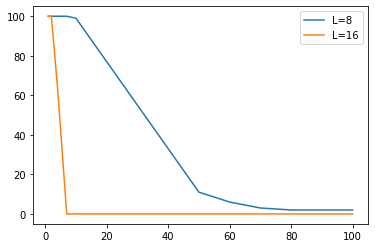

In [78]:
plt.plot(results[8].keys(), results[8].values(), label='L=8')
plt.plot(results[16].keys(), results[16].values(), label='L=16')
plt.legend()

## Robusntes against preprocessing methods
Possible preprocessing steps:
- normalization (other types of scalings, but this si probably equivalent) - well...
- feature selection (subset attack)
- outlier removal (subset attack)
- encoding the categorical - solution for this could either be finding the decoder or treat them as missing rows

## Robustness against classical attacks
THE QUESTION: From how much remaining data can the fingerprint still be extracted?
- this is supposed to give amount of remaining data (unchanged columns/rows) needed for a successful extraction (rate 100%? >99%?, >90%?) as a function of number of marks (or gamma)

Which knowledge does the owner still need? (e.g. primary key, order of columns, which columns are marked, ...)

In [25]:
confidence_rate = 0.98  # -> a changable parameter

In [26]:
from attacks import HorizontalSubsetAttack

In [27]:
attack = HorizontalSubsetAttack()

In [28]:
gamma = 20
xi = 1
fplen = 8
sk = 123
numbuyers = 10

In [29]:
# fingerprint the data
scheme = AKScheme(gamma, xi, fplen, sk, numbuyers)
fingerprinted_data = scheme.insertion(data, user, exclude=[target], primary_key_attribute=primary_key_attribute)

Start AK insertion algorithm...
	gamma: 20
	xi: 1

Generated fingerprint for buyer 1: 01110011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~6.295754026354319%
	single fingerprint bit embedded 3 times
Time: <1 sec.


In [30]:
# apply the attack
attacked_data = attack.run(fingerprinted_data, 0.50)

Subset attack runtime on 341 out of 683 entries: 0.0 sec.


In [31]:
# try and detect the fingerprint
suspect = scheme.detection(attacked_data, exclude=[target], primary_key_attribute=primary_key_attribute)

Start AK detection algorithm...
	gamma: 20
	xi: 1
Fingerprint detected: 01110011
Buyer 1 is suspected.
Runtime: 0 sec.


This (above) would be a general workflow. That workflow must be repeated n times for various gammae and various subset sizes:
- fingerprint the data
- apply the strongest attack (choose granularity of the attacks)
    - if the extraction rate is already below confidence rate, skip to the next strongest attack
- if confidence_rate % of fingerprints were successfully detected with the attack that removed r rows, but not for the one that removed r+dr rows, then r is the answer value, i.e. the answer to THE QUESTION
- repeat all above steps for various gammae

In [66]:
# from how much remaining data can the fingerprint still be extracted?
# todo: create a class Dataset that contains these stuff like primary-key-attr, exclude, include and other related stuffs
def inverse_robustness(attack, scheme, data, 
               primary_key_attribute=None, exclude=None, n_experiments=100, confidence_rate=0.99, attack_granularity=0.10):
    
    attack_strength = 0
    #attack_strength = attack.get_strongest(attack_granularity)  # this should return 0+attack_granularity in case of horizontal subset attack
    # attack_strength = attack.get_weaker(attack_strength, attack_granularity)
    while True:
        attack_strength += attack_granularity  # lower the strength of the attack
        if round(attack_strength,2) == 1.0:
            break
        robust = True
        success = n_experiments
        for exp_idx in range(n_experiments):
            # insert the data
            user = 1
            sk = exp_idx
            scheme.set_secret_key(sk)
            fingerprinted_data = scheme.insertion(data, user, exclude=exclude, primary_key_attribute=primary_key_attribute)
            attacked_data = attack.run(fingerprinted_data, attack_strength)

            # try detection
            suspect = scheme.detection(attacked_data, exclude=exclude, primary_key_attribute=primary_key_attribute)

            if suspect != user:
                success -= 1
            if success/n_experiments < confidence_rate:
                robust = False
                print('-------------------------------------------------------------------')
                print('-------------------------------------------------------------------')
                print('Attack ' + str(attack_strength) + " is too strong. Halting after " + str(exp_idx) + " iterations.")
                print('-------------------------------------------------------------------')
                print('-------------------------------------------------------------------')
                break  # attack too strong, continue with a lighter one
        if robust:
            return round(attack_strength,2) 
    return round(attack_strength,2)

In [67]:
gamma = 30
scheme = AKScheme(gamma, xi, fplen, sk, numbuyers)

In [68]:
remaining = inverse_robustness(attack, scheme, data, primary_key_attribute=primary_key_attribute, exclude=[target], 
                       attack_granularity=0.05)

Start AK insertion algorithm...
	gamma: 30
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~4.099560761346998%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 30
	xi: 1
Fingerprint detected: 22212222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 30
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~4.538799414348463%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 30
	xi: 1
Fingerprint detected: 22222222
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.05 is too strong. Halting after 1 itera

Subset attack runtime on 307 out of 683 entries: 0.000995635986328125 sec.
Start AK detection algorithm...
	gamma: 30
	xi: 1
Fingerprint detected: 01011111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 30
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~4.538799414348463%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 30
	xi: 1
Fingerprint detected: 21112211
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 30
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~3.3674963396778916%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 30
	xi: 1
Fingerprint detected: 12212110
None suspected.
Run

Fingerprint inserted.
	marked tuples: ~4.538799414348463%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 512 out of 683 entries: 0.0010509490966796875 sec.
Start AK detection algorithm...
	gamma: 30
	xi: 1
Fingerprint detected: 21110111
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.7500000000000001 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 30
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~4.099560761346998%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Subset attack runtime on 546 out of 683 entries: 0.0009980201721191406 sec.
Start AK detection algorithm...
	gamma: 30


In [69]:
remaining

1.0

In [70]:
print('For the fingerpirnt to be extracted, at least ' + str(int(remaining*100)) + "% of data rows must be present.")

For the fingerpirnt to be extracted, at least 100% of data rows must be present.


Now the above experiments shall be done for variety of gamma values.

In [71]:
gammae = [1, 2, 4, 7, 10, 50, 60, 70, 80, 90, 100]
resutls = {g: 0 for g in gammae}
for gamma in gammae:
    scheme = AKScheme(gamma, xi, fplen, sk, numbuyers)
    remaining = inverse_robustness(attack, scheme, data, primary_key_attribute=primary_key_attribute, exclude=[target], 
                           attack_granularity=0.05)
    resutls[gamma] = remaining

Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0009999275207519531 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01011111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 97 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fi

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 97 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 99 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 87 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma:

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 64 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0010156631469726562 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00010111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10101001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10101001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 92 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection al

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 99 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0009655952453613281 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 89 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.00099945068359375 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00011000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 90 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.000941753387

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 92 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11000001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00101111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 92 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 91 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma:

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 104 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0009987354278564453 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01000100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00001001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 11111011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 81 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection a

Fingerprint inserted.
	marked tuples: ~48.90190336749634%
	single fingerprint bit embedded 45 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11110000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.219619326500734%
	single fingerprint bit embedded 39 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~47.87701317715959%
	single fingerprint bit embedded 55 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
St

Fingerprint detected: 10010100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11011100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~47.87701317715959%
	single fingerprint bit embedded 48 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11011100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11001001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~54.02635431918009%
	single fingerprint bit embedded 43 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00000000
Inserting

Fingerprint inserted.
	marked tuples: ~47.58418740849194%
	single fingerprint bit embedded 47 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0009672641754150391 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01001011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11100000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.780380673499266%
	single fingerprint bit embedded 41 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10010010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.780380673499266%
	single fingerprint bit embedded 35 times
Time: <1 sec.
Subset attack runtime on 102 out of 68

Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.366032210834554%
	single fingerprint bit embedded 51 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0009992122650146484 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~55.19765739385066%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1:

Fingerprint detected: 10101001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~52.41581259150805%
	single fingerprint bit embedded 52 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0010128021240234375 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01000110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11100000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~47.43777452415813%
	single fingerprint bit embedded 40 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0009906291961669922 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerp

Fingerprint inserted.
	marked tuples: ~49.780380673499266%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0009448528289794922 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00011000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~47.73060029282577%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0009436607360839844 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00011000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11001111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.219619326500734%
	single fingerprint bit embedded 33 times
Time: <1 sec.
Subset attack runtim

Fingerprint inserted.
	marked tuples: ~49.194729136163986%
	single fingerprint bit embedded 47 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11000001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00101111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.194729136163986%
	single fingerprint bit embedded 45 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.00098419189453125 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.194729136163986%
	single fingerprint bit embedded 46 times
Time: <1 sec.
Subset attack runtime on 136 out of 683

Fingerprint inserted.
	marked tuples: ~50.366032210834554%
	single fingerprint bit embedded 43 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01000100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00001001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~48.6090775988287%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.001054525375366211 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11111011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~52.7086383601757%
	single fingerprint bit embedded 46 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 en

Fingerprint inserted.
	marked tuples: ~26.061493411420205%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.890190336749633%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0009799003601074219 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~30.45387994143485%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Subset attack runtime on 102 out of 68

Fingerprint inserted.
	marked tuples: ~24.890190336749633%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0009961128234863281 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~30.45387994143485%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.890190336749633%
	single fingerprint bit embedded 22 times
Time: <1 sec.
Subset attack runtime on 170 out of 68

Fingerprint inserted.
	marked tuples: ~28.69692532942899%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0009744167327880859 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01000110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11100000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~22.401171303074673%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00010111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~21.2298682284041%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 

Fingerprint inserted.
	marked tuples: ~23.42606149341142%
	single fingerprint bit embedded 21 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00011000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11001111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.183016105417277%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0009822845458984375 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11001111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.207906295754025%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Subset attack runtime on 170 out of 68

Fingerprint inserted.
	marked tuples: ~24.30453879941435%
	single fingerprint bit embedded 25 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0009205341339111328 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00201111
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~22.840409956076137%
	single fingerprint bit embedded 22 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00110000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11011110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.329428989751097%
	single fingerprint bit embedded 21 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entr

Fingerprint detected: 10001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01011100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.647144948755493%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0009949207305908203 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01011100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.183016105417277%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0009891986846923828 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10000110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated finge

Fingerprint detected: 10011101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10001010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~27.379209370424597%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10001010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10111000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~22.547584187408493%
	single fingerprint bit embedded 25 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10111000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01001011
Inserti

Fingerprint inserted.
	marked tuples: ~24.45095168374817%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00110001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11111010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.597364568081993%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11111010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.890190336749633%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.00099

Fingerprint inserted.
	marked tuples: ~29.428989751098094%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01010010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.036603221083453%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00111011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.061493411420205%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0009

Fingerprint inserted.
	marked tuples: ~24.743777452415813%
	single fingerprint bit embedded 17 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01011010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10011011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.647144948755493%
	single fingerprint bit embedded 26 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01100110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.47584187408492%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec

Fingerprint inserted.
	marked tuples: ~15.080527086383603%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0009970664978027344 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.641288433382138%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~16.98389458272328%
	single fingerprint bit embedded 22 times
Time: <1 sec.
Subset attack runtime on 204 out of 68

Fingerprint inserted.
	marked tuples: ~14.202049780380674%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 00000000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~15.226939970717424%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00000000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 11001010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.93411420204978%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.00098

Fingerprint inserted.
	marked tuples: ~12.298682284040996%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 273 out of 683 entries: 0.0010004043579101562 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11111100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 10001100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~16.691068814055637%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 273 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01011100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.641288433382138%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Subset attack runtime on 273 out of 6

Fingerprint inserted.
	marked tuples: ~12.445095168374817%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Subset attack runtime on 273 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 01110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~12.445095168374817%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Subset attack runtime on 273 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 02111001
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.39999999999999997 is too strong. Halting after 31 iterations.
-------------------------------------------------------------------
-------------------------

Fingerprint inserted.
	marked tuples: ~14.93411420204978%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11001010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~13.177159590043924%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00110000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 11110101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.93411420204978%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.


Fingerprint inserted.
	marked tuples: ~14.348462664714495%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 11101101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.348462664714495%
	single fingerprint bit embedded 17 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11101101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01110011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~15.519765739385067%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.00098

Fingerprint inserted.
	marked tuples: ~12.298682284040996%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10101011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01010101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~15.226939970717424%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 01010101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01001011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~18.594436310395317%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 se

Fingerprint inserted.
	marked tuples: ~13.177159590043924%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 00001000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.93411420204978%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00001000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01011001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~15.373352855051245%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.000995

Fingerprint inserted.
	marked tuples: ~10.834553440702782%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 12112222
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.05 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.68814055636896%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0009992122650146484 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 0122

Fingerprint inserted.
	marked tuples: ~9.66325036603221%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.68814055636896%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~9.66325036603221%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0 sec.

Fingerprint inserted.
	marked tuples: ~13.030746705710103%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.001001596450805664 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01011100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.980966325036604%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0009989738464355469 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01011100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~11.420204978038068%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Subset attack runt

Fingerprint detected: 01110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.052708638360176%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11001110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.784773060029282%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 12001110
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
--------------------------------------

Fingerprint detected: 01100001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11111100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~11.71303074670571%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 375 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11111100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10001100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~13.030746705710103%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Subset attack runtime on 375 out of 683 entries: 0.0009520053863525391 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buye

Fingerprint inserted.
	marked tuples: ~8.052708638360176%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 375 out of 683 entries: 0.0010030269622802734 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11001110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.784773060029282%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Subset attack runtime on 375 out of 683 entries: 0.0009987354278564453 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11002110
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.5499999999999999 is too strong. Halting after 32 iterations.
----------------------------------------------------------

Fingerprint inserted.
	marked tuples: ~10.68814055636896%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 00000000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11001010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~12.73792093704246%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11001010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~11.127379209370424%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0009

Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01100001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.395314787701318%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0009424686431884766 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01100001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11111100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~11.71303074670571%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0010004043579101562 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11111100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10001100
Inserting the fingerprint...

Finger

Fingerprint inserted.
	marked tuples: ~9.077598828696926%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10000011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01110011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~7.759882869692533%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0009722709655761719 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.052708638360176%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 443 out of 68

Fingerprint inserted.
	marked tuples: ~9.077598828696926%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0009272098541259766 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 00101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01101011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~9.66325036603221%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01101011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01100000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~7.613469985358712%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 

Fingerprint detected: 11000101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11110010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.980966325036604%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0009822845458984375 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11110010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01000011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.980966325036604%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01000011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for bu

Fingerprint detected: 00011101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11000011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~12.005856515373353%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11000011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10010111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~9.956076134699854%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0010085105895996094 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10010111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buye

Fingerprint inserted.
	marked tuples: ~2.4890190336749636%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.001001596450805664 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 22011221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.635431918008785%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 21222221
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.3 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------

Fingerprint inserted.
	marked tuples: ~2.635431918008785%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 11120121
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.65 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.4890190336749636%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 478 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 01011211
None suspec

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 22222222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 22222222
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.15000000000000002 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
---------------------------------

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 341 out of 683 entries: 0.0010094642639160156 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 22110221
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.49999999999999994 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 375 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprin

Fingerprint detected: 22110111
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.8500000000000002 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 614 out of 683 entries: 0.000982522964477539 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 01011212
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.9033

Fingerprint detected: 22012221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0009655952453613281 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 21122212
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.35 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.7320644216691069

Fingerprint detected: 22220212
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.7000000000000001 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.7320644216691069%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 512 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 22022211
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	s

Fingerprint inserted.
	marked tuples: ~1.7569546120058566%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 22212221
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.2 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 02022222
None suspect

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 02011212
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.7569546120058566%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0009634494781494141 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 22112122
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.6 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
------------------------------

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.000949859619140625 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22222222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0009822845458984375 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22122211
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.05 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------

Fingerprint detected: 22011222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22122121
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.44999999999999996 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	

Fingerprint detected: 21122111
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.8000000000000002 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 580 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 02011222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	s

Fingerprint detected: 22021222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 22222222
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.25 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single finge

Fingerprint detected: 21011221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 22222221
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.6 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single finger

Fingerprint detected: 12222221
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.9500000000000003 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------


In [72]:
resutls  # the inverse would be actual robustness: attacker can delete up to 1-res to not affect the fingerprint

{1: 0.1,
 2: 0.2,
 4: 0.3,
 7: 0.45,
 10: 0.65,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 1.0,
 90: 1.0,
 100: 1.0}

Text(0, 0.5, '% rows deleted')

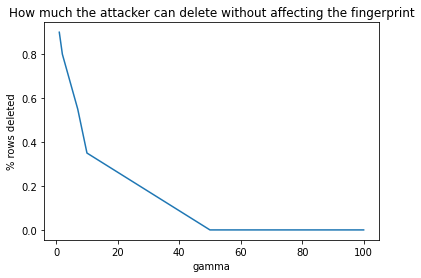

In [77]:
plt.plot(resutls.keys(), [1 - inv_robustness for inv_robustness in resutls.values()])
plt.title('How much the attacker can delete without affecting the fingerprint')
plt.xlabel('gamma')
plt.ylabel('% rows')